### Gruppe 3
 - Svetlana Marchenko Matrikel NR 20236284
 

Der Immobilienmarkt in Portugal ist hochgradig wettbewerbsintensiv und dynamisch, wobei die Preise aufgrund zahlreicher Faktoren erheblich variieren. Eine genaue Vorhersage von Immobilienpreisen kann Käufern, Verkäufern, Immobilienmaklern und Investoren helfen, fundierte Entscheidungen zu treffen. Das Ziel besteht darin, ein Modell zu entwickeln, das den Preis einer Immobilie basierend auf deren spezifischen Eigenschaften vorhersagen kann.

Ich arbeite mit Daten aus drei Quellen: `Aufgabe2_19052024.ipynb`, `webscrapingTest.ipynb` und `DataPreprocessing.ipynb`. Zusätzlich verwende ich `googleMaps.py` für geografische Informationen. Das Ziel dieses Projekts ist es, ein Modell zur Vorhersage der Wohnungspreise auf dem portugiesischen Immobilienmarkt zu erstellen, basierend auf den spezifischen Merkmalen der Immobilien.

Obwohl ich der Meinung bin, dass die Variable `Floor` eine Rolle bei der Bestimmung des Wohnungspreises spielen könnte, wird sie aufgrund unzureichender Datenwerte in dieser Analyse nicht berücksichtigt.

Die Daten von Immobilien auf den Inseln der Azoren und Madeira habe ich nach eingehender Überlegung ausgenommen. Der Immobilienmarkt dort ist äußerst spezifisch und orientiert sich eher an Ferienwohnungen, was sich deutlich von dem Markt für Wohnimmobilien unterscheidet.

Fragestellung: Wie können wir anhand von Merkmalen wie Standort, Größe, Ausstattung und anderen Faktoren den Preis von Immobilien in Portugal modellieren und vorhersagen?

 Die vorliegenden Daten umfassen Immobilieninformationen wie Standort, Preis, Anzahl der Zimmer, Flächenangaben sowie verschiedene Merkmale wie Parkmöglichkeiten und Aufzugverfügbarkeit.


In der arbeite Ich mit dem *Wohnungen* Datensatz. Dieser umfasst 1717 Beobachtungen zu den Verkaufspreisen von Wohnungen in Portugal (auser Inseln). Die Daten sind in der Datei `dataconcatPropertyAndAge2905-00.csv` abgelegt.
## Variablenbeschreibung

1. `Location:` Der Standort der Immobilie. Dies umfasst den Stadtteil und die Stadt bzw. Gemeinde.

2. `Price:` Der Verkaufspreis der Immobilie in Euro.

3. `Rooms:` Die Anzahl der Zimmer in der Immobilie.

4. `WCs:` Die Anzahl der Badezimmer in der Immobilie.

5. `Net Floor Area (m2):` Die Netto-Wohnfläche der Immobilie in Quadratmetern. Dies bezieht sich auf die tatsächliche nutzbare Fläche innerhalb der Wände.

6. `Gross Private Area (m2):` Die Bruttowohnfläche der Immobilie in Quadratmetern. Dies umfasst die gesamte Fläche inklusive der Wände und anderen gemeinschaftlichen Bereichen.

7. `Parking:` Die Anzahl der verfügbaren Parkplätze zur Immobilie.

8. `Floor:` Die Etage, auf der sich die Immobilie befindet. Dieser Wert wird aufgrund unzureichender Datenwerte nicht in die Analyse einbezogen.

9. `Energy Performance Certificate:` Das Energieleistungszertifikat der Immobilie. Dies gibt die Energieeffizienz der Immobilie an.

10. `Elevator_Not available:` Ein Boolean-Wert (True/False), der angibt, ob ein Aufzug in der Immobilie nicht verfügbar ist.

11. `Capital:` Ein Boolean-Wert (True/False), der angibt, ob sich die Immobilie in der Hauptstadt Lissabon befindet.

12. `Metropolitan Areas:` Ein Boolean-Wert (True/False), der angibt, ob sich die Immobilie in einer Metropolregion befindet.

13. `Large cities:` Ein Boolean-Wert (True/False), der angibt, ob sich die Immobilie in einer Großstadt befindet.

14. `Coastal Locations:` Ein Boolean-Wert (True/False), der angibt, ob sich die Immobilie in einer Küstenregion befindet.

15. `Median Age:` Das mittlere Alter der Bevölkerung in der Region, in der sich die Immobilie befindet.

16. `Distance To Ocean: ` Die Entfernung der Immobilie zum Meer in Kilometern.


In [117]:
# Laden der notwendigen Bibliotheken
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns   # https://seaborn.pydata.org

# Make sure the plots are displayed inline (within the notebook)
%matplotlib inline
import numpy as np
import csv

FILENAME_DATASET ="dataconcatPropertyAndAge2905-23-48.csv"

In [118]:
#Datensatz wird kopiert und  kontroliert ob die Dimension des Datensatzes ist korrekt
df = pd.read_csv(FILENAME_DATASET,
                 sep=';',
                 encoding='ISO-8859-1',
                 header=0, 
                 )
df_Copy = df
nSpalten = df_Copy.shape[1]
nZeilen = df_Copy.shape[0]
if nSpalten == 16 and nZeilen == 1717:
    print(
       f"Der Datensatz hat  Zeilen {nZeilen} und {nSpalten} Spalten. Die Dimension des Datensatzes ist korrekt.")
else:
    print(f"Fehler: Der Datensatz hat nicht die erwartete Dimension  {nZeilen}  und {nSpalten}"  )


Der Datensatz hat  Zeilen 1717 und 16 Spalten. Die Dimension des Datensatzes ist korrekt.


In [119]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        1717 non-null   object 
 1   Price                           1717 non-null   int64  
 2   Rooms                           1717 non-null   int64  
 3   WCs                             1717 non-null   int64  
 4   Net Floor Area (m2)             1602 non-null   float64
 5   Gross Private Area (m2)         1575 non-null   float64
 6   Parking                         1717 non-null   int64  
 7   Floor                           875 non-null    float64
 8   Energy Performance Certificate  1717 non-null   object 
 9   Elevator_Not available          1717 non-null   bool   
 10  Capital                         1717 non-null   bool   
 11  Metropolitan Areas              1717 non-null   bool   
 12  Large cities                    17

Die Werte der Variablen entsprechen den erwarteten Werten. Das Einlesen der Daten funktioniert anscheinend.

Die Variablen 'Gross Private Area' und 'Net Floor Area (m2)' sind wichtige Faktoren für den Preis von Wohnungen. Die Brutto-Privatfläche bezieht sich auf die Gesamtfläche der Wohnung, einschließlich aller privaten Bereiche wie Wohnzimmer, Schlafzimmer und Badezimmer. Die Netto-Grundfläche ist die effektive Wohnfläche, die von den Bewohnern genutzt werden kann und schließt möglicherweise gemeinschaftlich genutzte Bereiche wie Flure und Treppenhäuser aus. Beide Variablen spielen eine entscheidende Rolle bei der Bestimmung des Wohnungspreises, wobei größere Flächen in der Regel zu höheren Preisen führen, da sie mehr Raum und Wohnkomfort bieten.
Bei mir fehlen einige Values für die Variablen. 

In [120]:
#Filtern des DataFrames nach fehlenden Werten in 'Gross Private Area' oder 'Net Floor Area (m2)'
missing_values_subset = df_Copy[df_Copy['Gross Private Area (m2)'].isnull() | df_Copy['Net Floor Area (m2)'].isnull()]

# Display the filtered DataFrame
print(missing_values_subset)

                                               Location   Price  Rooms  WCs  \
21                  Fânzeres e São Pedro da Cova, Porto  220000      2    2   
22                  Fânzeres e São Pedro da Cova, Porto  220000      2    2   
34    Seixal, Arrentela e Aldeia de Paio Pires, Setúbal  199000      3    1   
36    Cedofeita, Santo Ildefonso, Sé, Miragaia, São ...  160000      0    1   
45                           Matosinhos Sul, Matosinhos  295000      1    1   
...                                                 ...     ...    ...  ...   
1648                                Águas Santas, Porto  270000      2    2   
1663                                   Cavalinha, Olhão  250000      2    2   
1676                                      Beato, Lisboa  269000      3    1   
1692                                    Virtudes, Porto  990000      2    3   
1709                          Gafanha da Nazaré, Ílhavo   99000      1    1   

      Net Floor Area (m2)  Gross Private Area (m2) 

#### Imputation 

Imputation Net Floor Area (m2)

Ich werde versuchen Korrelation zwichen 'Net Floor Area (m2)' und 'Rooms' finden und  fehlende Werte in 'Net Floor Area (m2)' zu füllen

In [121]:
correlation = df_Copy['Net Floor Area (m2)'].corr(df_Copy['Rooms'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.7542617046310335


Da die Wohnungen sind meisten nach typiche Standarten gebaut es macht Sin, dass die 'Net Floor Area (m2)' und 'Rooms' stark korrelieren. Ein Korrelationskoeffizient von 0.7542 zwischen 'Rooms' und 'Net Floor Area (m2)' deutet auf eine starke positive lineare Korrelation zwischen diesen beiden Variablen hin. Dies bedeutet, dass größere Werte für 'Net Floor Area (m2)' tendenziell mit größeren Werten für 'Rooms' einhergehen, und umgekehrt. 

In [122]:
# Fehlende Werte in 'Net Floor Area (m2)' auffüllen
mean_net_area = df_Copy.groupby('Rooms')['Net Floor Area (m2)'].transform('mean')
#df_Copy['Net Floor Area (m2)'].fillna(mean_net_area, inplace=True)
df_Copy['Net Floor Area (m2)'] = df_Copy['Net Floor Area (m2)'].fillna(mean_net_area)
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        1717 non-null   object 
 1   Price                           1717 non-null   int64  
 2   Rooms                           1717 non-null   int64  
 3   WCs                             1717 non-null   int64  
 4   Net Floor Area (m2)             1717 non-null   float64
 5   Gross Private Area (m2)         1575 non-null   float64
 6   Parking                         1717 non-null   int64  
 7   Floor                           875 non-null    float64
 8   Energy Performance Certificate  1717 non-null   object 
 9   Elevator_Not available          1717 non-null   bool   
 10  Capital                         1717 non-null   bool   
 11  Metropolitan Areas              1717 non-null   bool   
 12  Large cities                    17

Imputation Gross Private Area (m2)

Ich werde versuchen Korrelation zwichen 'Gross Private Area (m2)' und 'Net Floor Area (m2)' finden und  fehlende Werte in 'Gross Private Area (m2)' zu füllen

In [123]:
correlation = df_Copy['Net Floor Area (m2)'].corr(df_Copy['Gross Private Area (m2)'])
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.8147315960440462


Ein Korrelationskoeffizient von 0.8174 zwischen 'Gross Private Area (m2)' und 'Net Floor Area (m2)' deutet auf eine starke positive lineare Korrelation zwischen diesen beiden Variablen hin. Dies bedeutet, dass größere Werte für 'Net Floor Area (m2)' tendenziell mit größeren Werten für 'Gross Private Area (m2)' einhergehen, und umgekehrt. In Wohnungen mit einer größeren Nutzfläche ist es also wahrscheinlicher, dass auch die Gesamtfläche größer ist, und umgekehrt.

Ich entscheide mich für die Berechnung des Mittelwerts, da die Berechnung stellt sicher, dass die ergänzten Werte repräsentativ für die Verteilung der "Brutto-Privatfläche (m2)" innerhalb jeder Gruppe sind, die durch die "Netto-Grundfläche (m2)" definiert wird. Dies trägt dazu bei, die Gesamtverteilung der Daten zu erhalten.Insgesamt ist die Verwendung des Mittelwerts zur Auffüllung fehlender Werte eine gängige Methode, die einen Ausgleich zwischen der Beibehaltung der Datenverteilung und der Einfachheit der Implementierung darstellt. 

In [124]:

# Fehlende Werte in 'Gross Private Area (m2)' auffüllen
mean_gross_private_area = df_Copy.groupby('Net Floor Area (m2)')['Gross Private Area (m2)'].transform('mean')
print(mean_gross_private_area)
#df_Copy['Gross Private Area (m2)'].fillna(mean_gross_private_area, inplace=True)
df_Copy['Gross Private Area (m2)'] = df_Copy['Gross Private Area (m2)'].fillna(mean_gross_private_area)


0       144.533333
1        77.384615
2       164.000000
3        97.333333
4        91.470588
           ...    
1712     66.777778
1713    104.133333
1714    109.142857
1715     87.714286
1716     80.950000
Name: Gross Private Area (m2), Length: 1717, dtype: float64


In [125]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        1717 non-null   object 
 1   Price                           1717 non-null   int64  
 2   Rooms                           1717 non-null   int64  
 3   WCs                             1717 non-null   int64  
 4   Net Floor Area (m2)             1717 non-null   float64
 5   Gross Private Area (m2)         1602 non-null   float64
 6   Parking                         1717 non-null   int64  
 7   Floor                           875 non-null    float64
 8   Energy Performance Certificate  1717 non-null   object 
 9   Elevator_Not available          1717 non-null   bool   
 10  Capital                         1717 non-null   bool   
 11  Metropolitan Areas              1717 non-null   bool   
 12  Large cities                    17

In [126]:
#Filtern des DataFrames nach fehlenden Werten in 'Gross Private Area' oder 'Net Floor Area (m2)'
missing_values_subset = df_Copy[df_Copy['Gross Private Area (m2)'].isnull() | df_Copy['Net Floor Area (m2)'].isnull()]

# Display the filtered DataFrame
print(missing_values_subset)

                                               Location   Price  Rooms  WCs  \
21                  Fânzeres e São Pedro da Cova, Porto  220000      2    2   
22                  Fânzeres e São Pedro da Cova, Porto  220000      2    2   
34    Seixal, Arrentela e Aldeia de Paio Pires, Setúbal  199000      3    1   
36    Cedofeita, Santo Ildefonso, Sé, Miragaia, São ...  160000      0    1   
61                                    Corroios, Setúbal  198500      2    1   
...                                                 ...     ...    ...  ...   
1551                             Alta de Lisboa, Lisboa  420000      1    1   
1556                                    Boavista, Porto  280000      1    1   
1579                            Penha de França, Lisboa  179000      2    1   
1637                                Águas Santas, Porto  279000      2    2   
1648                                Águas Santas, Porto  270000      2    2   

      Net Floor Area (m2)  Gross Private Area (m2) 

Löschen der Datensätze, bei denen die Variable "Distance To Ocean" größer als 300 ist,da die Entfernung zum Ozean in kontinentalen Portugal nicht größer als 300 sein kann. Auserdemm die Variable wird bereinigt 

In [127]:
# Löschen der Datensätze, bei denen die Variable "Distance to Ocean" größer als 300 ist
df_Copy = df_Copy[df_Copy['Distance To Ocean'] <= 300]
df_Copy['Distance To Ocean'] = pd.to_numeric(df_Copy['Distance To Ocean'], errors='coerce')
df_Copy.dropna(subset=['Distance To Ocean'], how='all', inplace=True)




C:\Users\sve75036\AppData\Local\Temp\ipykernel_20728\2440610686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Copy['Distance To Ocean'] = pd.to_numeric(df_Copy['Distance To Ocean'], errors='coerce')
C:\Users\sve75036\AppData\Local\Temp\ipykernel_20728\2440610686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Copy.dropna(subset=['Distance To Ocean'], how='all', inplace=True)


### Deskriptive Statistik

Funktion wird verwendet, um aggregierte Statistiken über Spalten mit numerischen Values eines DataFrame zu berechnen. 

In [129]:
# Aggregation von price und stories
df_Copy.agg(
    {
        "Price": ["count", "mean", "median", "std", "min", "max"],
        "Distance To Ocean": ["count", "median", "mean", "std", "min", "max"],
        "Parking": ["count", "mean", "median", "std", "min", "max"],
        "Floor": ["count", "mean", "median", "std", "min", "max"],
        "Rooms": ["count", "mean", "median", "std", "min", "max"],
        "WCs": ["count", "mean", "median", "std", "min", "max"],
        "Net Floor Area (m2)": ["count", "mean", "median", "std", "min", "max"],
        "Gross Private Area (m2)": ["count", "mean", "median", "std", "min", "max"],
        "Median Age": ["count", "mean", "median", "std", "min", "max"],
    }
).round(2)

,Price,Distance To Ocean,Parking,Floor,Rooms,WCs,Net Floor Area (m2),Gross Private Area (m2),Median Age
count,1691.00,1691.00,1691.00,861.00,1691.00,1691.00,1691.00,1576.00,1691.00
mean,274732.95,25.58,0.68,2.17,2.28,1.68,92.01,108.35,46.48
median,240000.00,13.00,1.00,2.00,2.00,2.00,89.00,100.00,46.60
std,144744.02,27.99,0.77,1.86,0.94,0.70,33.80,49.08,1.86
min,10800.00,0.00,0.00,-1.00,0.00,1.00,25.00,9.00,42.60
max,990000.00,171.00,6.00,12.00,6.00,5.00,256.00,727.00,59.80


1) Schon nach der ersten Aggregation lässt sich erkennen, dass die meisten Immobilien sich nicht weit entfernt von der Küste befinden. Obwohl es einige Immobilienmärkte gibt, die sich weiter entfernt von der Küste befinden (maximal 171 km von der Küste entfernt), sind die meisten Städte eher in Küstennähe angesiedelt.

2) Obwohl es gibt die Wohnungen ohne Parking - mindestens Hälfte der Wohnungen 1 oder noch mehere Parkings besitzen

3) Die Höheste Etage im Angebot ist 12, was kann bedeuten, dass es kaum oder ganz wenig Gebäuden in Portugal gibt, die höhe als 12 Etagen sind

4) Obwohl die kleinste Wohnung im Angebot eine Fläche von 25 Quadratmetern hat, sind die Wohnungen tendenziell groß genug. 

quantile(0.1) berechnet das 10. Perzentil der Werte in der "Price"-Spalte. Das bedeutet, dass 10% der Preise in df_Copy niedriger oder gleich dem Wert von Price_q10 sind.
quantile(0.9) berechnet das 90. Perzentil der Werte in der "Price"-Spalte. Das bedeutet, dass 90% der Preise in df_Copy niedriger oder gleich dem Wert von Price_q90 sind.

In [130]:
Price_q10 = df_Copy.Price.quantile(0.1)
Price_q90 = df_Copy.Price.quantile(0.9)

# Create a dataframe with the statistics
statistics_Price = pd.DataFrame(data={"Price": [Price_q10, Price_q90]},
                                 index=["q10", "q90"]).round(2)
statistics_Price.head()

,Price
q10,145500.0
q90,455000.0



#### Hypothese mit einer Gruppierungsvariable

1) Der mittlere Wohnungspreis ist höher für die Wohnungen in Hauptstadt Gegenden als  in nicht Hauptstadt Gegenden.

2) Der Wohnungspreis senkt mit der Entfernung von Ozean.

In [131]:
# Prüfe Hypothese 1: "Die Wohnungen in der Haupstadt sind teure"
df.groupby("Capital")["Price"].agg(["mean", "median", "std"]).round(2)

,mean,median,std
Capital,,,
False,254127.51,225000.0,122006.16
True,388405.74,349250.0,198672.32


Die Analyse der durchschnittlichen Preise von Wohnungen in Hauptstädten im Vergleich zu anderen Gebieten zeigt, dass Wohnungen in Hauptstädten tendenziell teurer sind. Im Durchschnitt liegt der Preis für Wohnungen in Hauptstädten bei 388,405.74 Einheiten, während er außerhalb der Hauptstädte bei 254,127.51 Einheiten liegt. Ebenso ist die Streuung der Preise innerhalb der Hauptstädte mit einem Standardabweichungswert von 198,672.32 höher im Vergleich zu Gebieten außerhalb der Hauptstädte (Standardabweichung: 122,006.16)

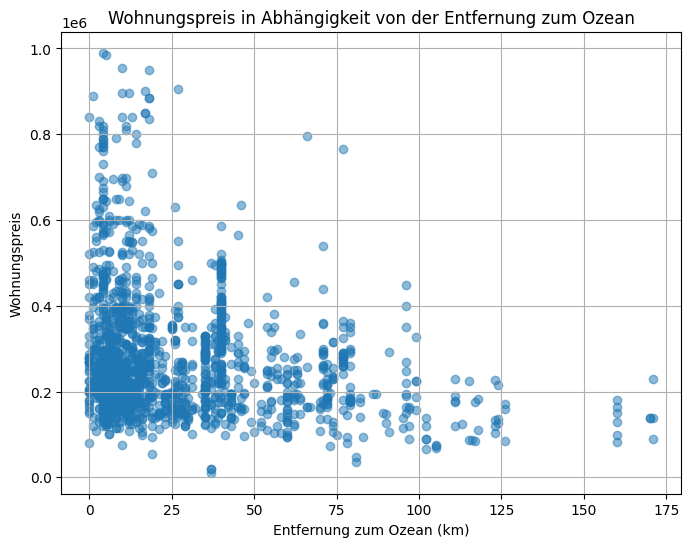

In [132]:
# Prüfe Hypothese 2: "Der Wohnungspreis senkt mit der Entfernung von Ozean."

# Streudiagramm erstellen
plt.figure(figsize=(8, 6))
plt.scatter(df_Copy['Distance To Ocean'], df_Copy['Price'], alpha=0.5)
plt.title('Wohnungspreis in Abhängigkeit von der Entfernung zum Ozean')
plt.xlabel('Entfernung zum Ozean (km)')
plt.ylabel('Wohnungspreis')
plt.grid(True)
plt.show()


In [136]:
# Definiere die Altersgruppen
bins = [ 0, 3, 5, 10,float('inf')]
labels = ['coastal', 'easy reach coast', 'reach by bike','car needed']

# Füge eine neue Spalte mit den Altersgruppen hinzu
df_Copy['Distance_Group'] = pd.cut(df['Distance To Ocean'], bins=bins, labels=labels, right=False)

# Zeige den DataFrame mit der neuen Spalte an
df_Copy.head()

C:\Users\sve75036\AppData\Local\Temp\ipykernel_20728\373185240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Copy['Distance_Group'] = pd.cut(df['Distance To Ocean'], bins=bins, labels=labels, right=False)


,Location,Price,Rooms,WCs,Net Floor Area (m2),Gross Private Area (m2),Parking,Floor,Energy Performance Certificate,Elevator_Not available,Capital,Metropolitan Areas,Large cities,Coastal Locations,Median Age,Distance To Ocean,Distance_Group
0,"Rio Tinto - Medancelhe, Gondomar",220000,4,2,126.0,161.0,1,0.0,Not available,True,False,True,False,False,47.1,9.0,reach by bike
1,"Arroios, Lisboa",365000,2,1,67.0,67.0,0,NaN,Not available,True,True,True,True,False,44.8,12.0,car needed
2,"Fafe, Braga",220000,4,3,180.0,164.0,0,NaN,Not available,True,False,False,True,False,44.4,50.0,car needed
3,"Bonfim, Porto",230000,3,2,87.0,87.0,0,NaN,Not available,True,False,True,True,True,47.0,6.0,reach by bike
4,"Benfica, Lisboa",460000,3,2,81.0,104.0,1,9.0,Energy Performance Certificate,False,True,True,True,False,44.8,9.0,reach by bike


<Axes: xlabel='distance from the ocean', ylabel='number of appartments'>

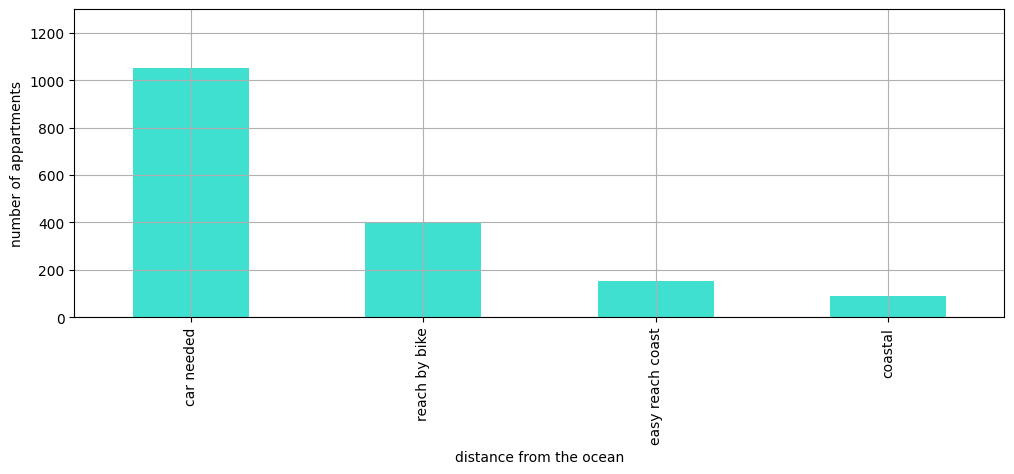

In [140]:
# Zeigen die statistiken nach altersgruppen für alle Kunden 
FIGSIZE = (12, 4)
YLABEL = "number of appartments"
XLABEL = "distance from the ocean"
GRID = True


df_Copy["Distance_Group"].value_counts().plot.bar(
    figsize=FIGSIZE, ylabel=YLABEL, xlabel=XLABEL, ylim=(0, 1300), grid=GRID, color='turquoise')

In [ ]:

FIGSIZE = (12, 4)
YLABEL = "number of customers in the group"
XLABEL = "age group"
GRID = True
# Farben für Männer und Frauen Definieren
colors = {'Male': 'blue', 'Female': 'pink'}
# Group the data by 'Age_Group' and 'Gender', and count the number of individuals in each group

# die Daten nach „Age_Group“ und „Gender“ Gruppieren  und  die Anzahl der Personen in jeder Gruppe zählen 
age_gender_counts = df_Copy.groupby(['Age_Group', 'Gender'] , observed=True).size().unstack()

#Zeichnen des gestapelten Balkendiagramms mit unterschiedlichen Farben für Männer und Frauen
ax = age_gender_counts.plot.bar( stacked=True, figsize=(12, 4), color=colors.values(),  ylabel=YLABEL, xlabel=XLABEL, ylim=(0, 800), grid=GRID)



